<center>
<div style="color:;
           display:fill;
           border-radius:2px;
           background-color: thistle;
           font-size:110%;
           letter-spacing:0.6px">

<h2 style="padding: 30px;
              color:snow;"> Practica 4: Fisiologíca

</h2>
</div>

In [1]:
from scipy import signal
import os
import numpy as np
import pandas as pd
import heartpy as hp
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, butter, filtfilt

In [2]:
pip install heartpy

Note: you may need to restart the kernel to use updated packages.


<center>
<div style="color:;
           display:fill;
           border-radius:2px;
           background-color: violet;
           font-size:80%;
           letter-spacing:0.6px">

<h2 style="padding: 20px;
              color:snow;"> Procesamiento de los datos
</h2>
</div>

In [54]:
csv_files = {
    "ANDRES": "DT.FISIO/ANDRES.csv",
    "ARIANA": "DT.FISIO/ARIANA.csv",
    "DAFNE": "DT.FISIO/DAFNE.csv",
    "JESUS": "DT.FISIO/JESUS.csv",
    "RACHEL": "DT.FISIO/RACHEL.csv",
    "SCARLETT": "DT.FISIO/SCARLETT.csv"
}

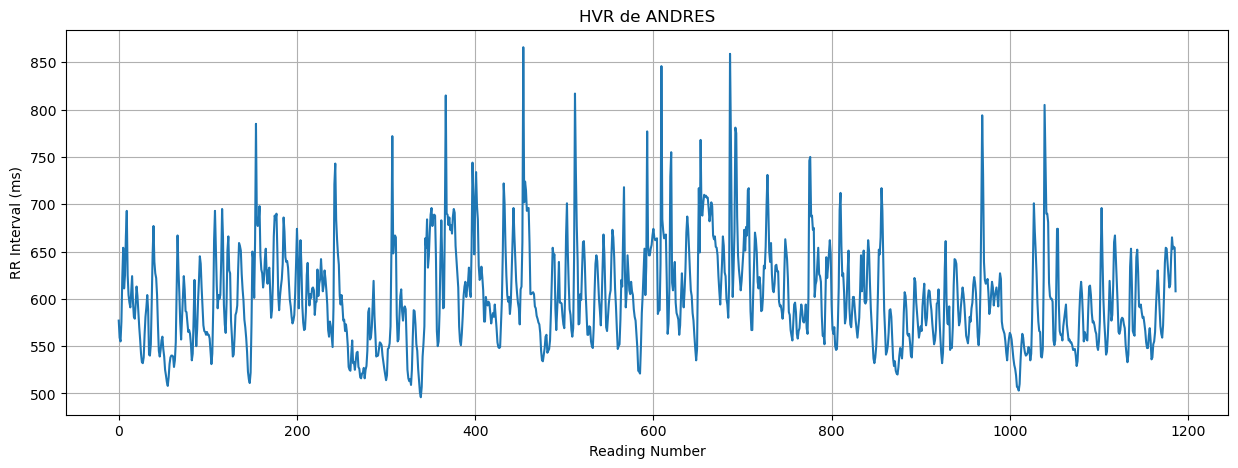

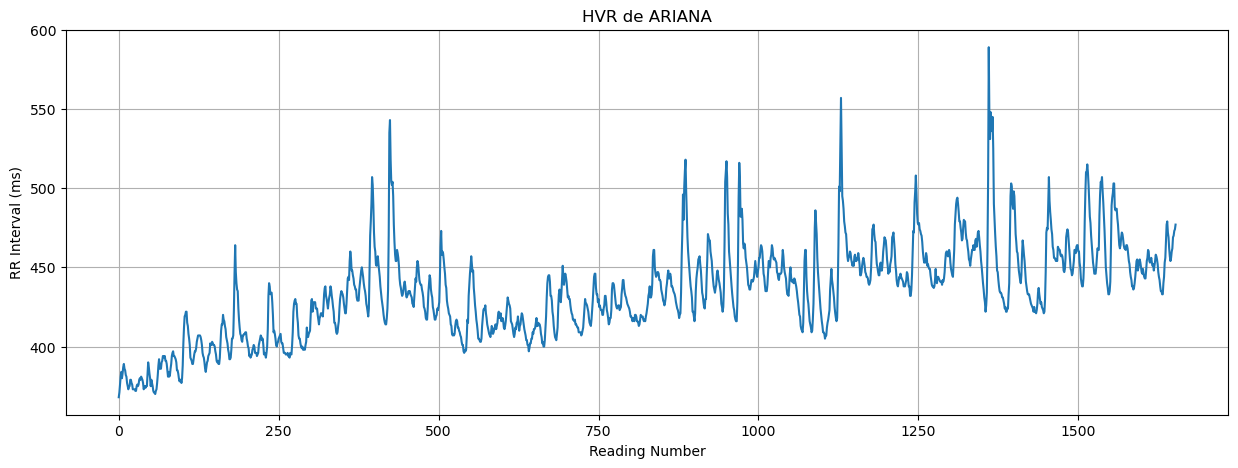

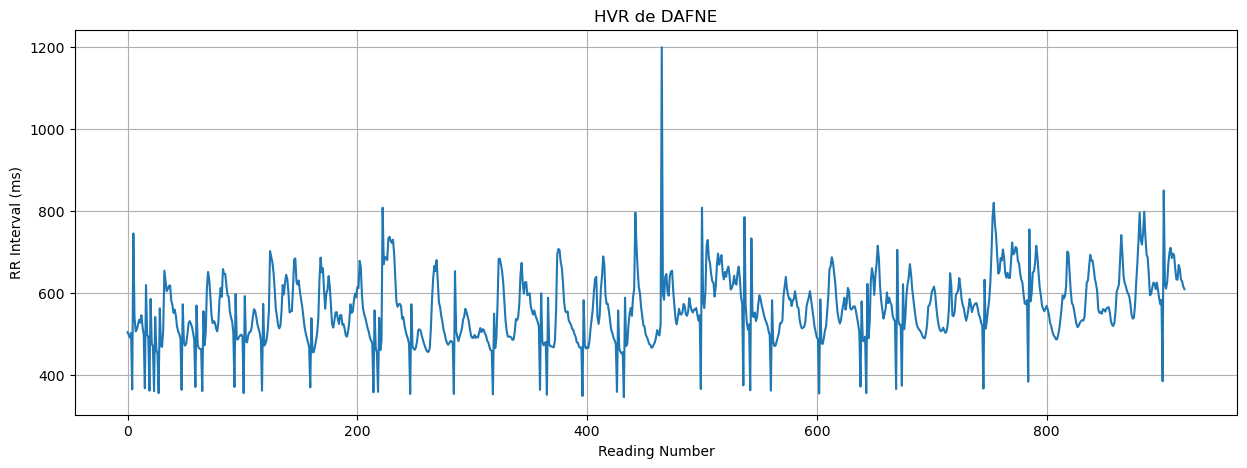

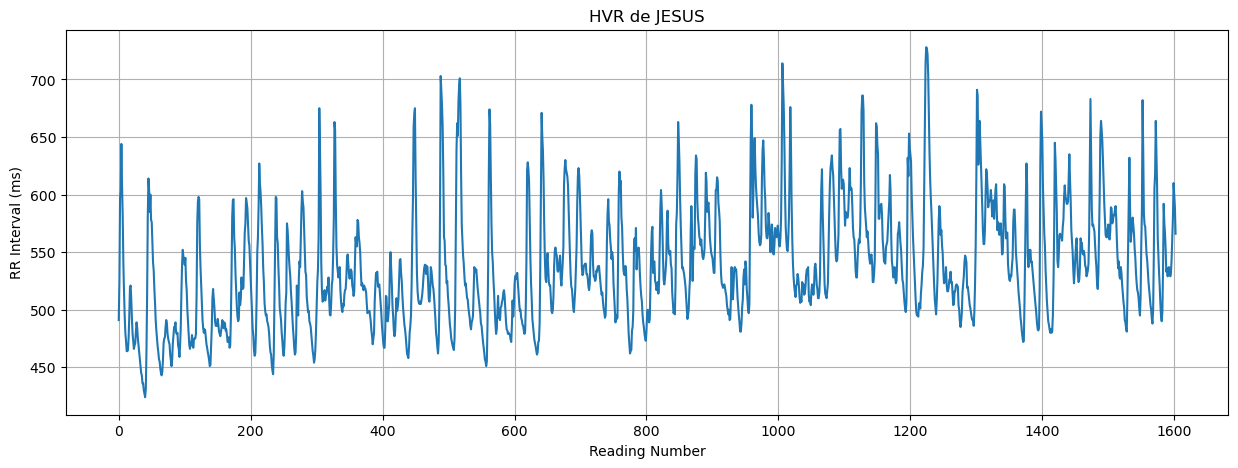

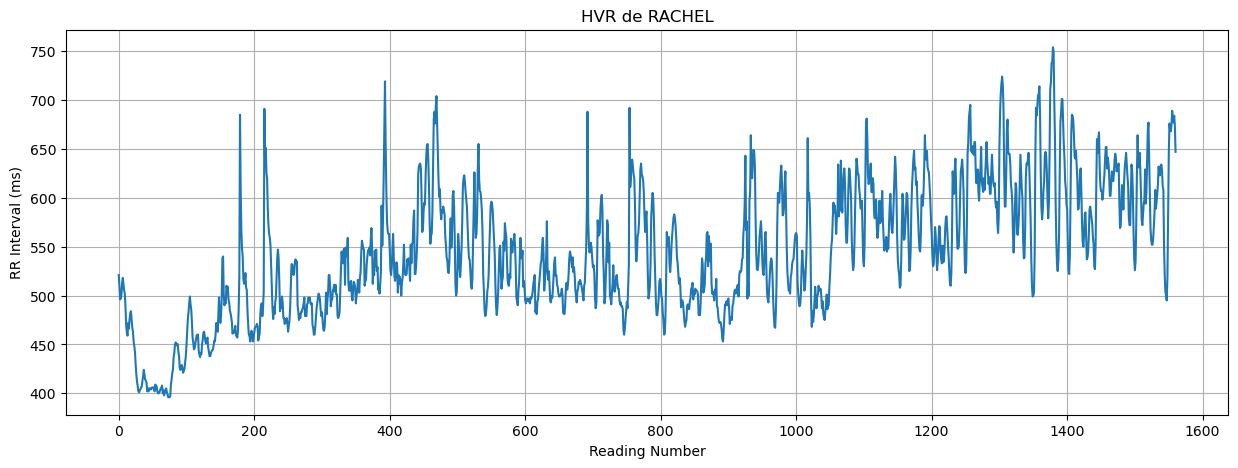

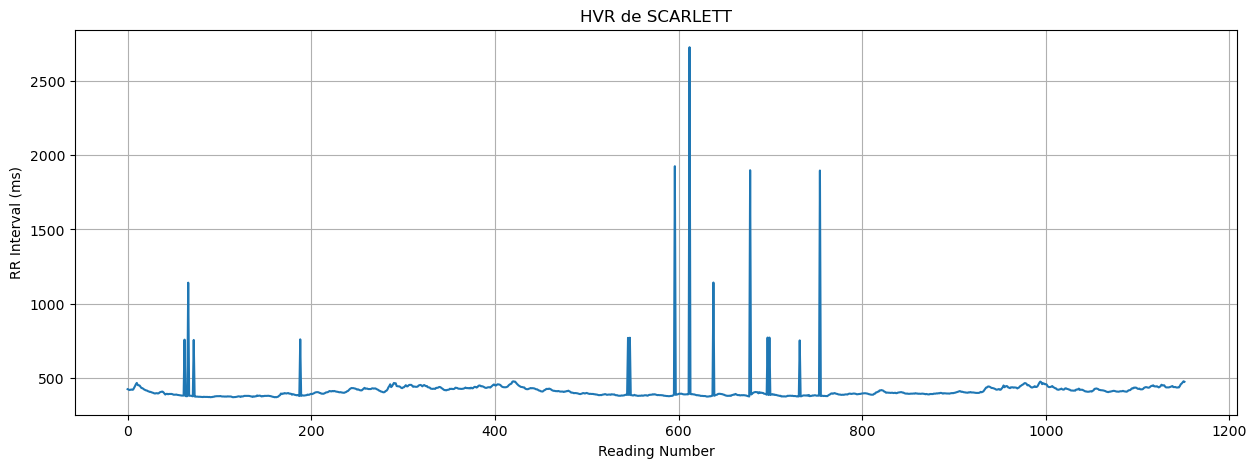

In [22]:
def plot_rr_intervals(file_path, name):
  
    if not os.path.isfile(file_path):
        print(f"No se encontró el archivo: {file_path}")
        return
        
    df = pd.read_csv(file_path)
    
    rr_intervals = df.iloc[:, 0].values

    sample_rate = 1  
    time_series = [i / sample_rate for i in range(len(rr_intervals))]

    plt.figure(figsize=(15, 5))
    plt.plot(time_series, rr_intervals, marker='', linestyle='-', markersize=3)
    plt.title(f'HVR de {name}')
    plt.xlabel('Reading Number')
    plt.ylabel('RR Interval (ms)')
    plt.grid(True)
    plt.show()

for name, file_path in csv_files.items():
    plot_rr_intervals(file_path, name)

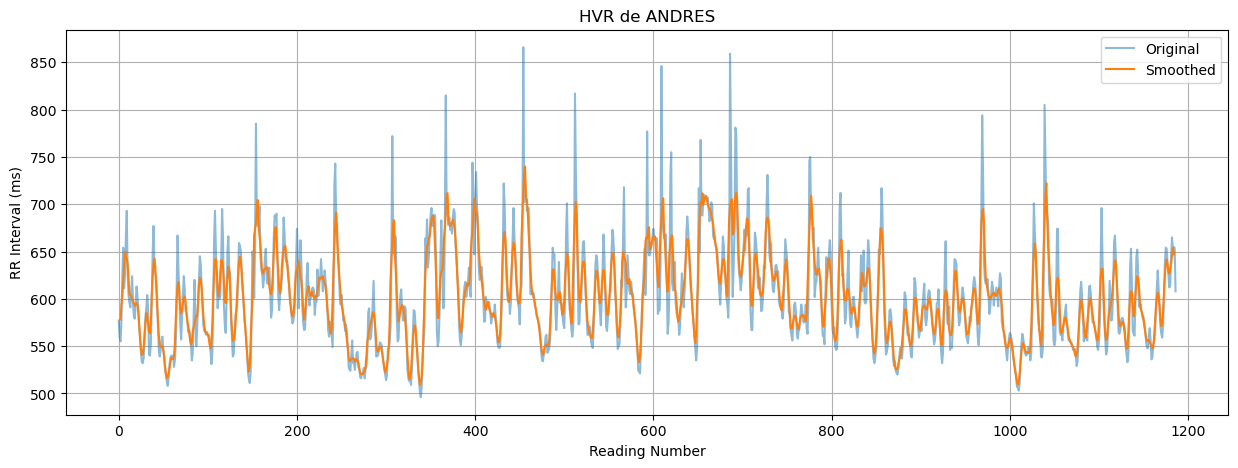

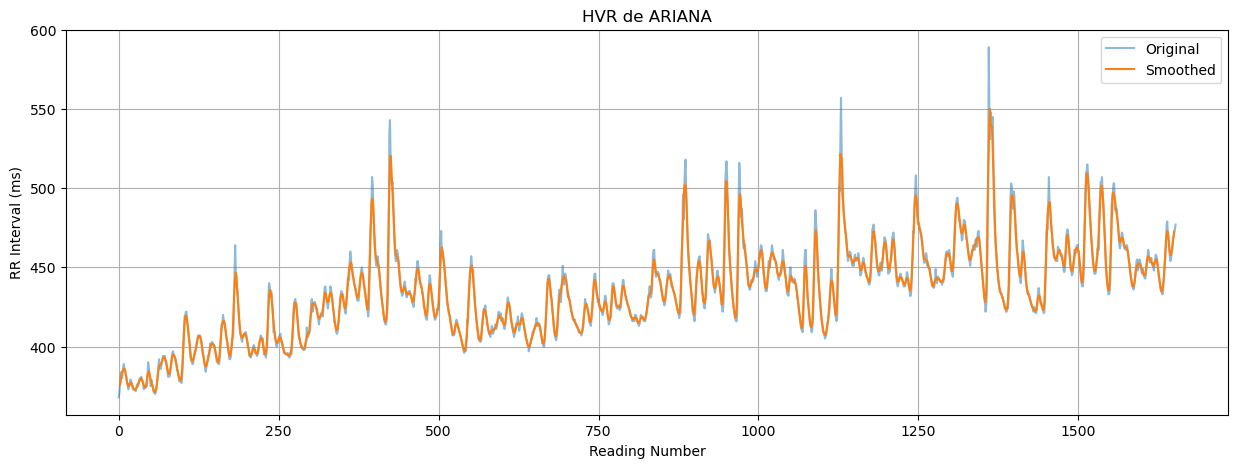

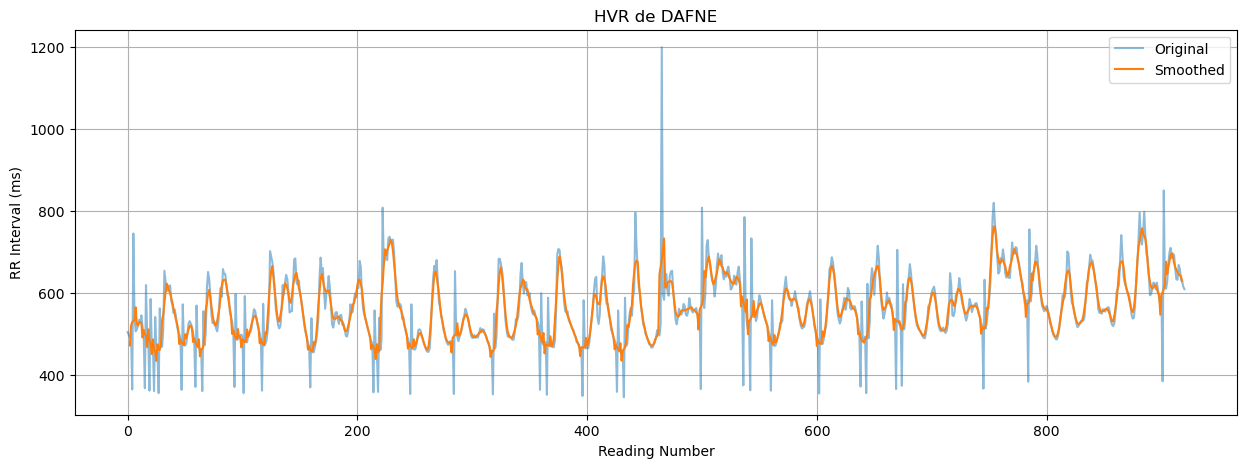

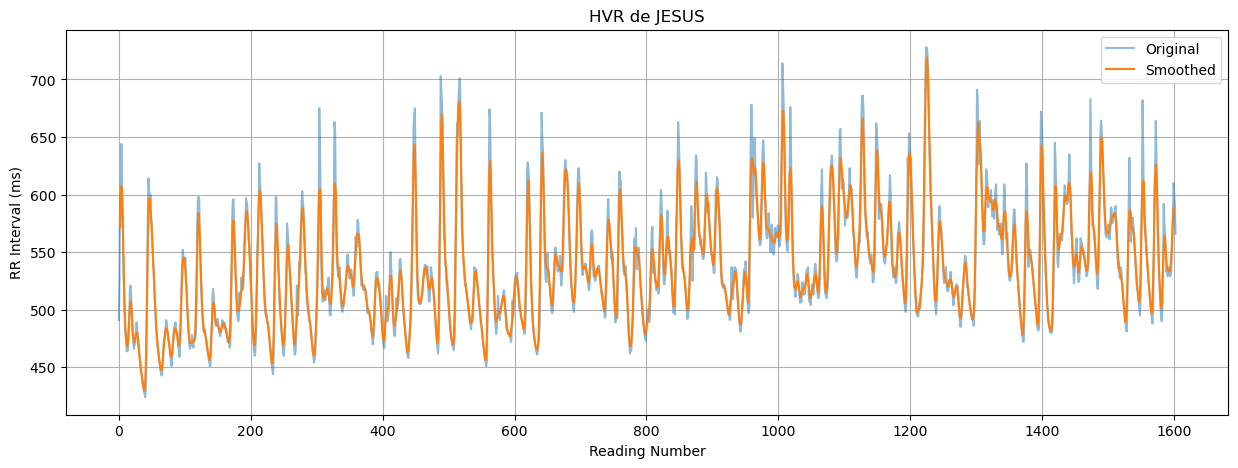

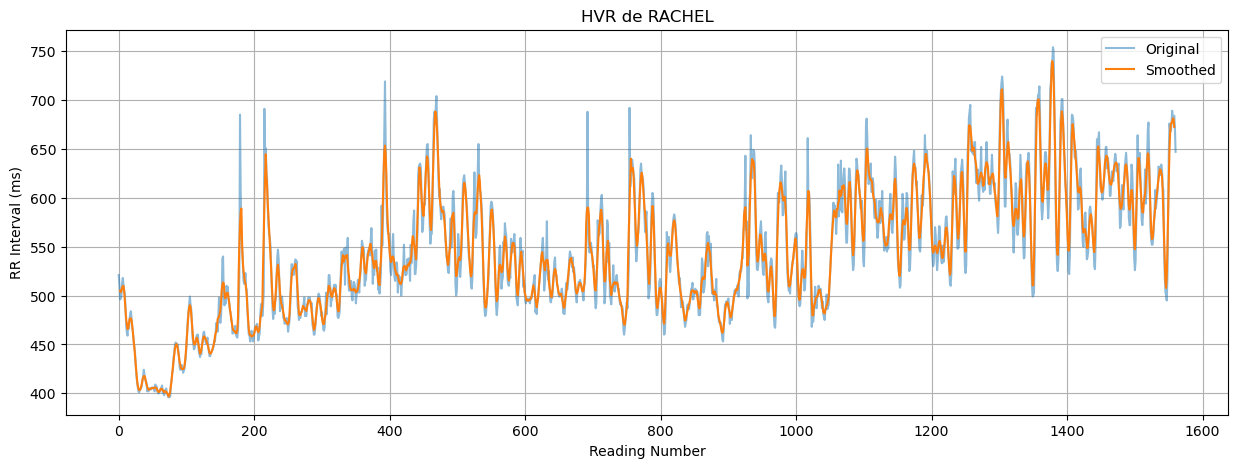

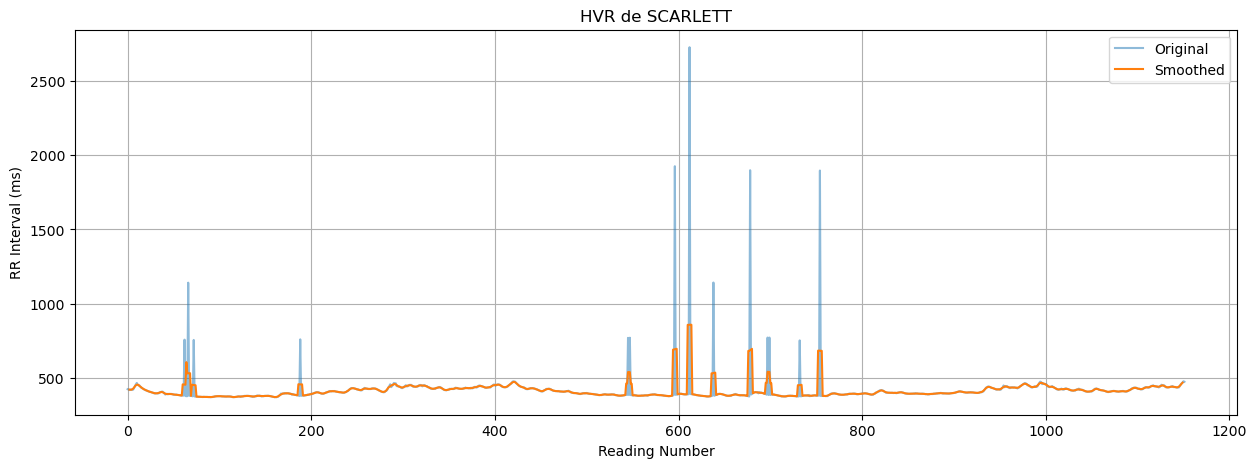

In [23]:
def plot_rr_intervals(file_path, name, window_size=5):
    
    if not os.path.isfile(file_path):
        print(f"No se encontró el archivo: {file_path}")
        return
        
    df = pd.read_csv(file_path)
    
    rr_intervals = df.iloc[:, 0].values

    rr_intervals_smoothed = pd.Series(rr_intervals).rolling(window=window_size, center=True).mean()

    sample_rate = 1 
    time_series = [i / sample_rate for i in range(len(rr_intervals))]

    # Graficar los intervalos RR originales y suavizados
    plt.figure(figsize=(15, 5))
    plt.plot(time_series, rr_intervals, alpha=0.5, marker='', linestyle='-', markersize=3, label='Original')
    plt.plot(time_series, rr_intervals_smoothed, marker='', linestyle='-', markersize=3, label='Smoothed')
    plt.title(f'HVR de {name}')
    plt.xlabel('Reading Number')
    plt.ylabel('RR Interval (ms)')
    plt.legend()
    plt.grid(True)
    plt.show()

for name, file_path in csv_files.items():
    plot_rr_intervals(file_path, name)


In [69]:
def calculate_hrv_metrics(rr_intervals):
    rr_intervals = np.array(rr_intervals)

    rmssd = np.sqrt(np.mean(np.square(np.diff(rr_intervals))))
    sdnn = np.std(rr_intervals, ddof=1)

    f, pxx = signal.welch(rr_intervals, fs=4.0, nperseg=len(rr_intervals)//4, scaling='density')
    vlf = np.trapz(pxx[(f >= 0.0033) & (f <= 0.04)])  
    lf = np.trapz(pxx[(f > 0.04) & (f <= 0.15)])     
    hf = np.trapz(pxx[(f > 0.15) & (f <= 0.4)])     

    return rmssd, sdnn, vlf, lf, hf

hrv_metrics = {}

for name, file_path in csv_files.items():
    
    data = pd.read_csv(file_path)
    
    rr_intervals = data.iloc[:, 0].values
    rmssd, sdnn, vlf, lf, hf = calculate_hrv_metrics(rr_intervals)
    hrv_metrics[name] = {
        "RMSSD": rmssd,
        "SDNN": sdnn,
        "VLF": vlf,
        "LF": lf,
        "HF": hf
    }

hrv_metrics

hrv_df = pd.DataFrame.from_dict(hrv_data, orient='index')
hrv_df = pd.DataFrame(hrv_metrics).T
hrv_df.columns = [f"{col} (ms)" if col in ["RMSSD", "SDNN"] else f"{col} (ms^2)" for col in hrv_df.columns]

# Evaluación del estado general basado en las métricas HRV
for name, metrics in hrv_metrics.items():
    if metrics['RMSSD'] < 15 or metrics['SDNN'] < 30:
        overall = 'Estres(Nervios)'
    elif metrics['RMSSD'] > 50 and metrics['SDNN'] > 70:
        overall = 'Sin estres(Sin nervios)'
    else:
        overall = 'Control de estres(Nervios controlados)'
    hrv_metrics[name]['Overall'] = overall

hrv_df = pd.DataFrame.from_dict(hrv_metrics, orient='index')
hrv_df.columns = [f"{col} (ms)" if col in ["RMSSD", "SDNN"] else f"{col} (ms^2)" for col in hrv_df.columns[:-1]] + ['Overall']

# Guardar el DataFrame en un archivo CSV
hrv_df.to_csv('hrv_data_with_overall.csv')


Interpretación de datos que se encuentran en el CSV hrv_data_with_overall.csv, cada uno de estos estan proporcionados para cada individuo y cómo se comparan con las referencias típicas:

**ANDRES**:
- RMSSD: 32.53 ms (dentro de un rango típico normal)
- SDNN: 52.79 ms (considerado normal, pero en el límite inferior)
- VLF: 13282.51 ms^2 (relativamente alto, sugiere buena regulación autónoma)
- LF: 52438.50 ms^2 (alto, puede indicar un buen equilibrio autonómico y una respuesta al estrés)
- HF: 65172.71 ms^2 (alto, sugiere una predominancia de la actividad parasimpática)

**ARIANA**:
- RMSSD: 6.93 ms (muy bajo, puede indicar estrés o falta de recuperación)
- SDNN: 29.51 ms (bajo, puede sugerir menor resiliencia al estrés)
- VLF: 7400.38 ms^2 (bajo, puede indicar menor regulación autónoma)
- LF: 11610.90 ms^2 (relativamente bajo)
- HF: 13603.90 ms^2 (relativamente bajo, puede indicar bajo nivel de actividad parasimpática)

**DAFNE**:
- RMSSD: 76.01 ms (alto, muy bueno para la regulación del estrés y la recuperación)
- SDNN: 83.52 ms (alto, sugiere buena variabilidad y resiliencia al estrés)
- VLF: 15340.37 ms^2 (bueno)
- LF: 87182.11 ms^2 (muy alto, indica una fuerte influencia autonómica)
- HF: 97206.05 ms^2 (muy alto, excelente indicador de actividad parasimpática)

**JESUS**:
- RMSSD: 19.55 ms (moderado, pero podría ser mejor)
- SDNN: 50.95 ms (considerado normal, pero en el límite inferior)
- VLF: 27889.83 ms^2 (alto, bueno)
- LF: 41670.48 ms^2 (alto)
- HF: 107062.31 ms^2 (extremadamente alto, excelente actividad parasimpática)

**RACHEL**:
- RMSSD: 21.23 ms (moderado)
- SDNN: 66.42 ms (considerado normal)
- VLF: 28060.47 ms^2 (alto)
- LF: 59064.36 ms^2 (alto)
- HF: 79025.34 ms^2 (alto, buena actividad parasimpática)

**SCARLETT**:
- RMSSD: 159.93 ms (extremadamente alto, excelente para la regulación del estrés y la recuperación)
- SDNN: 113.32 ms (muy alto, indica una excelente variabilidad y resiliencia al estrés)
- VLF: 10220.30 ms^2 (moderado)
- LF: 35609.42 ms^2 (alto)
- HF: 132745.16 ms^2 (extremadamente alto, excelente actividad parasimpática)

Estas interpretaciones están hechas en el contexto general de la HRV, donde un RMSSD y SDNN más altos generalmente sugieren una mejor regulación autónoma y una mayor resiliencia al estrés. La actividad VLF, LF y HF reflejan diferentes aspectos de la regulación autonómica, con LF y HF proporcionando información sobre el equilibrio simpático-parasimpático. Un HF alto generalmente se asocia con una buena regulación parasimpática, lo que es beneficioso para la recuperación y la relajación.

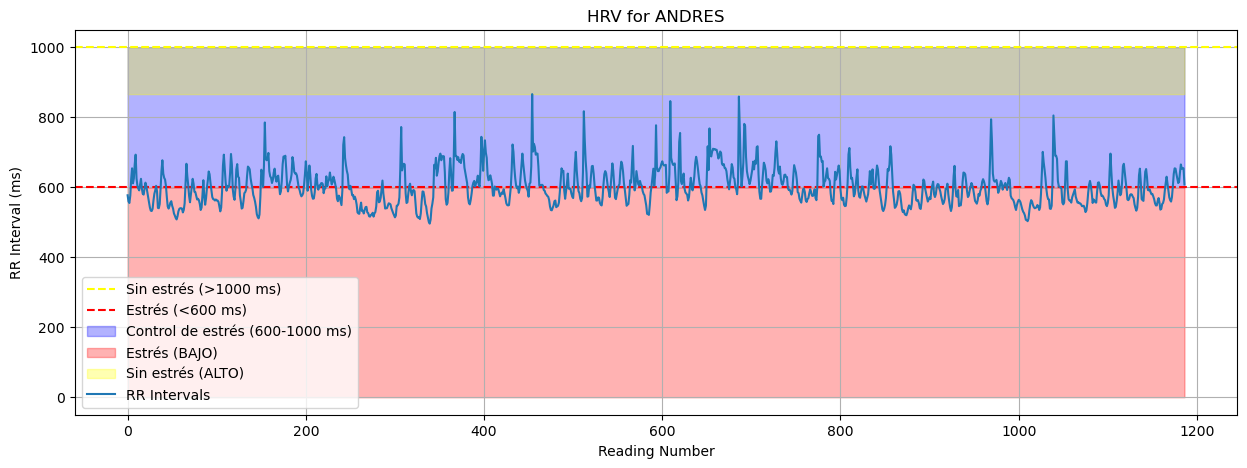

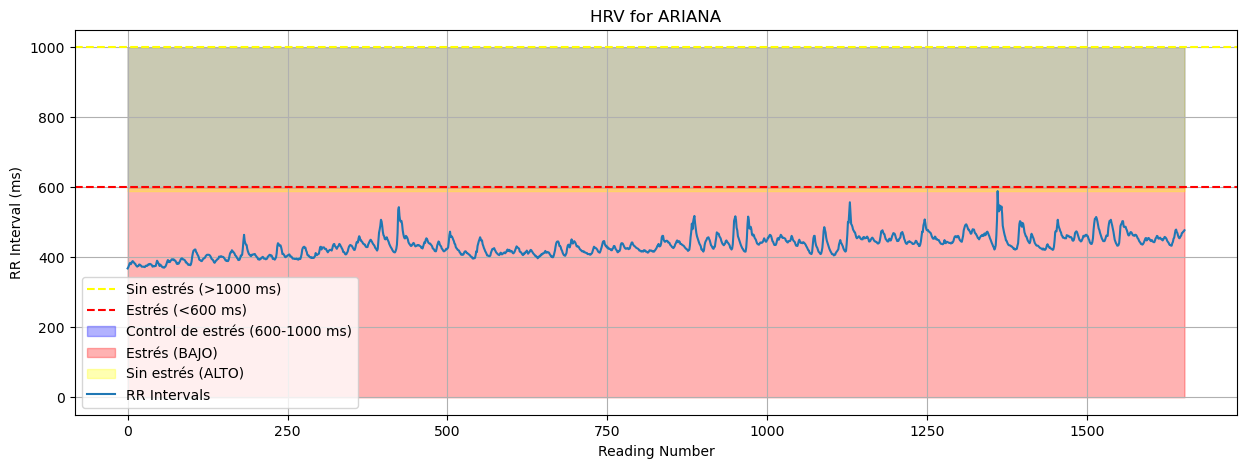

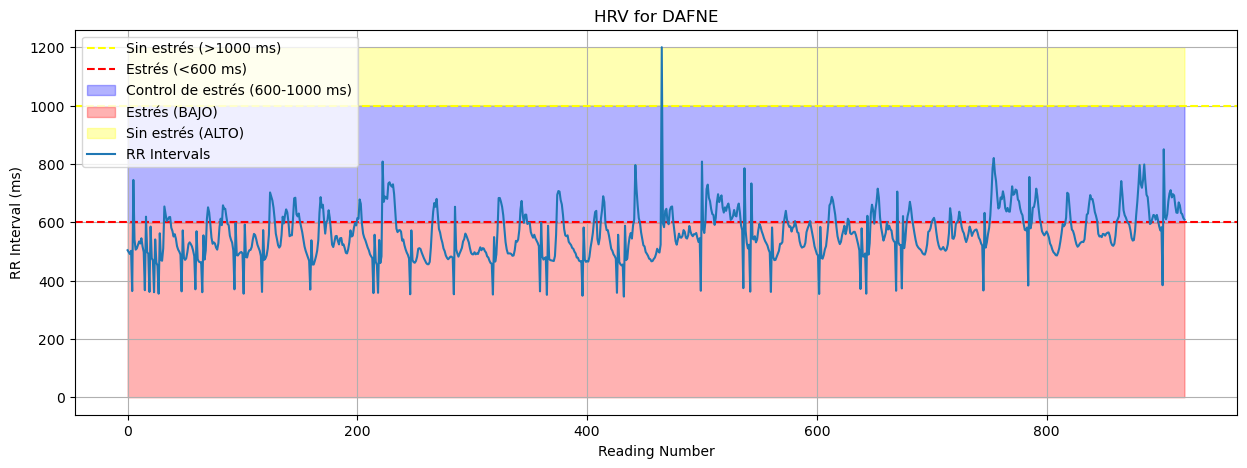

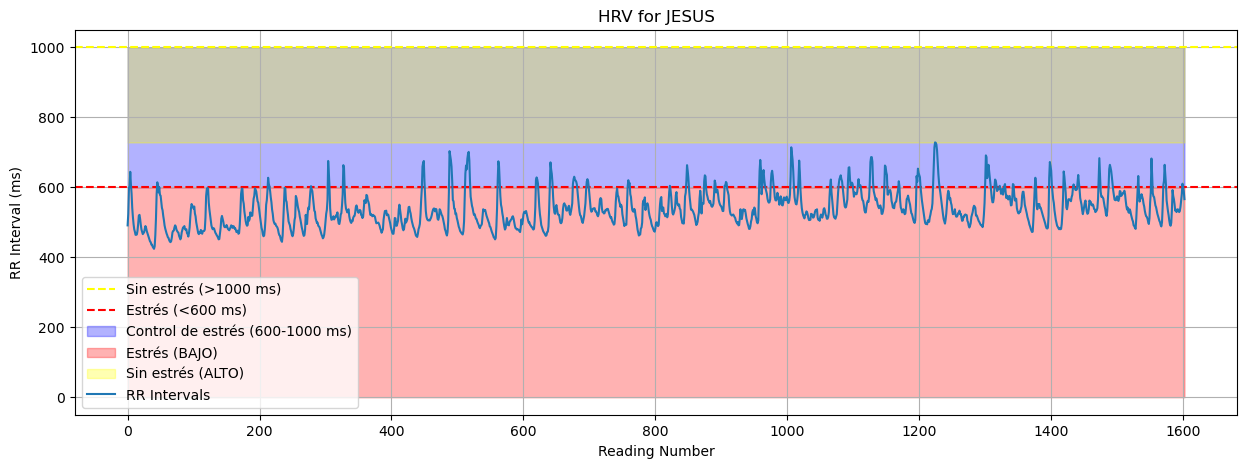

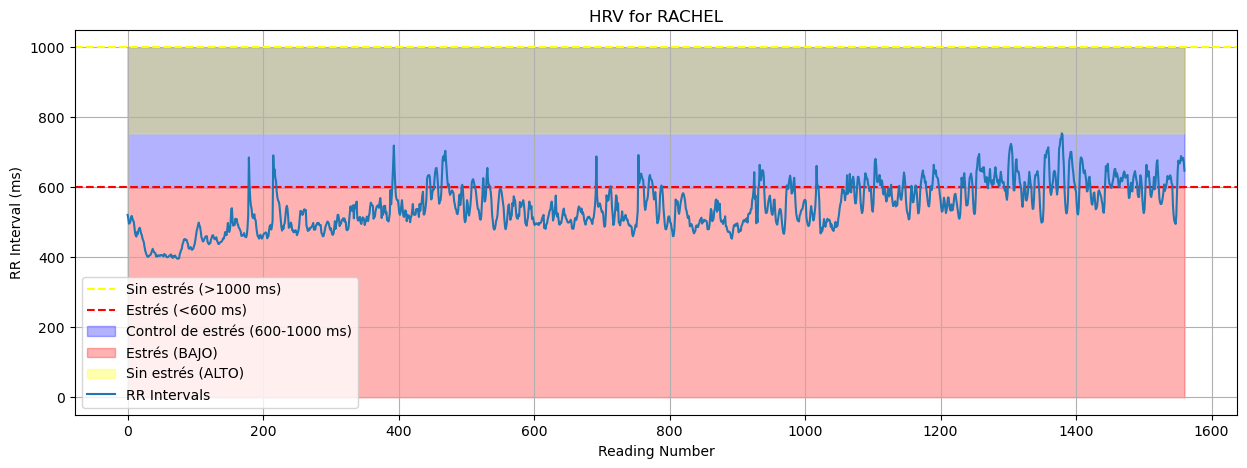

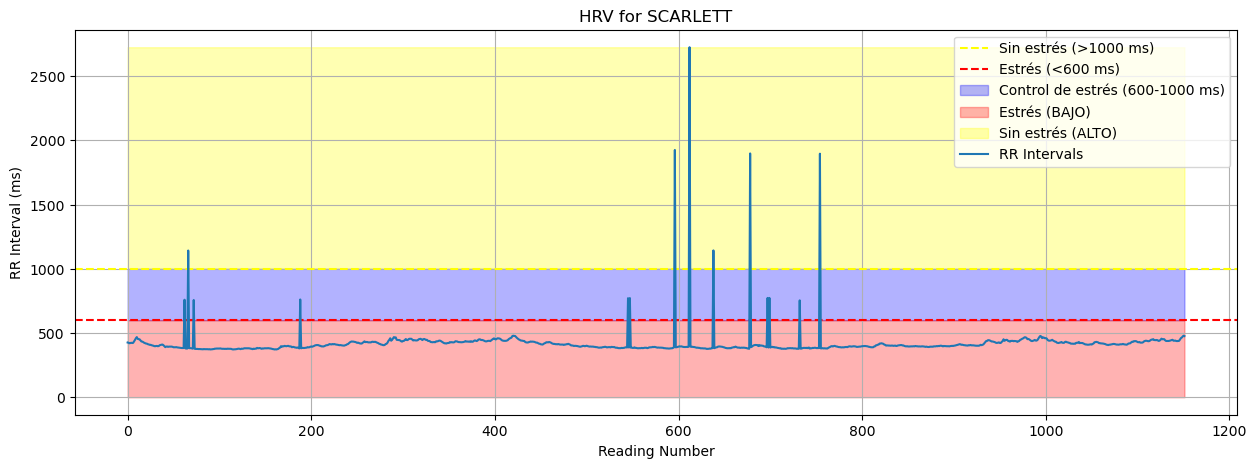

In [56]:
def plot_rr_intervals(file_path, name):
    if not os.path.isfile(file_path):
        print(f"No se encontró el archivo: {file_path}")
        return
        
    df = pd.read_csv(file_path)
    rr_intervals = df.iloc[:, 0].values
    sample_rate = 1
    time_series = [i / sample_rate for i in range(len(rr_intervals))]

    plt.figure(figsize=(15, 5))
    
    # Agregar líneas horizontales para los umbrales de estrés
    plt.axhline(y=1000, color='yellow', linestyle='--', label='Sin estrés (>1000 ms)')
    plt.axhline(y=600, color='red', linestyle='--', label='Estrés (<600 ms)')
    
    # Áreas sombreadas para indicar los niveles de estrés
    plt.fill_between(time_series, 600, 1000, color='blue', alpha=0.3, label='Control de estrés (600-1000 ms)')
    plt.fill_between(time_series, 0, 600, color='red', alpha=0.3, label='Estrés (BAJO)')
    plt.fill_between(time_series, 1000, max(rr_intervals), color='yellow', alpha=0.3, label='Sin estrés (ALTO)')
    
    # Graficar los intervalos RR originales
    plt.plot(time_series, rr_intervals, marker='', linestyle='-', markersize=3, label='RR Intervals')

    plt.title(f'HRV for {name}')
    plt.xlabel('Reading Number')
    plt.ylabel('RR Interval (ms)')
    plt.legend()
    plt.grid(True)
    plt.show()

for name, file_path in csv_files.items():
    plot_rr_intervals(file_path, name)


Este codigo nos proporciona representación visual de los intervalos RR, que se explican a continuación:

Se logra visualizar los intervalos RR, que son medidas de variabilidad de la frecuencia cardíaca, y se usa para interpretar si una persona estaba estresada, relajada o tenía un control de estrés durante las mediciones basado en la duración de los intervalos RR.

Las áreas sombreadas y las líneas horizontales ayudan a identificar visualmente estas condiciones de cada individuo, donde los intervalos RR cortos (<600 ms) pueden indicar estrés, los largos (>1000 ms) podrían sugerir relajación o baja activación simpática, y los intermedios (600-1000 ms) se consideran como control de estrés. 

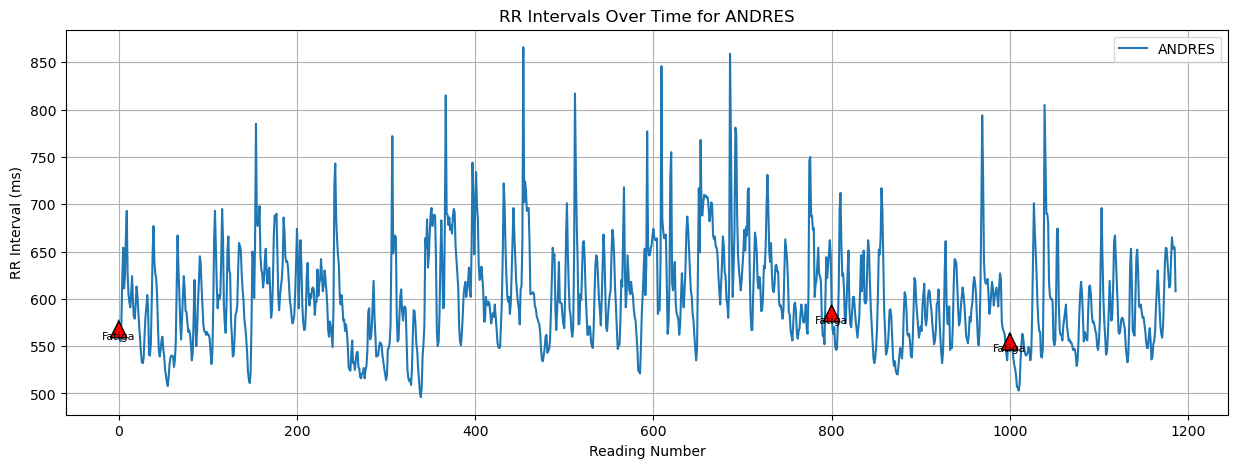

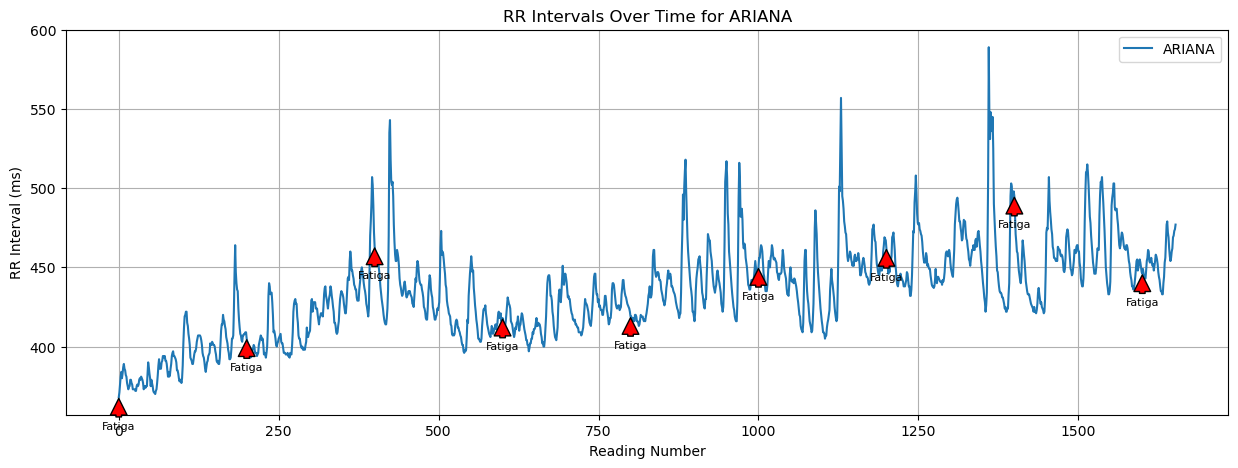

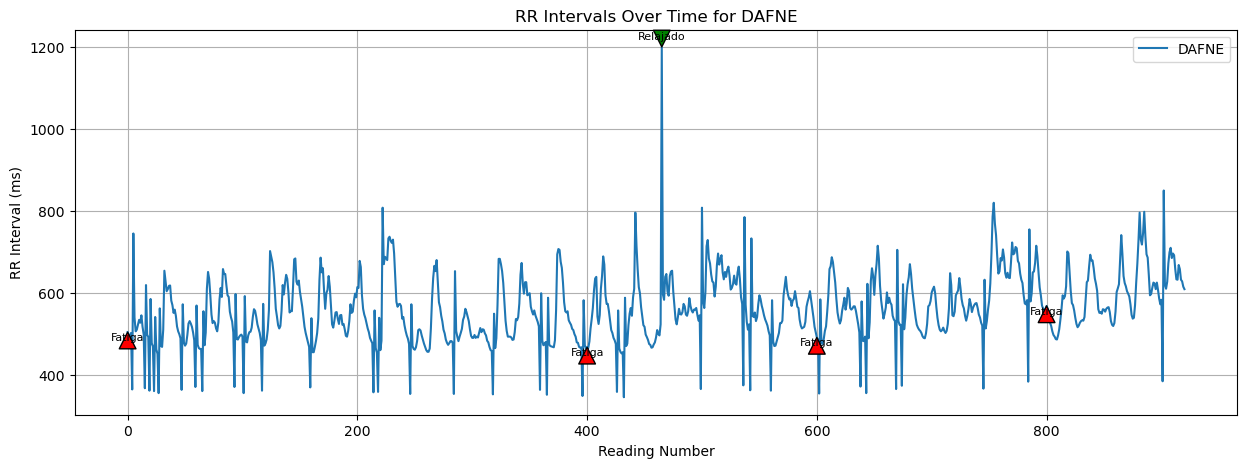

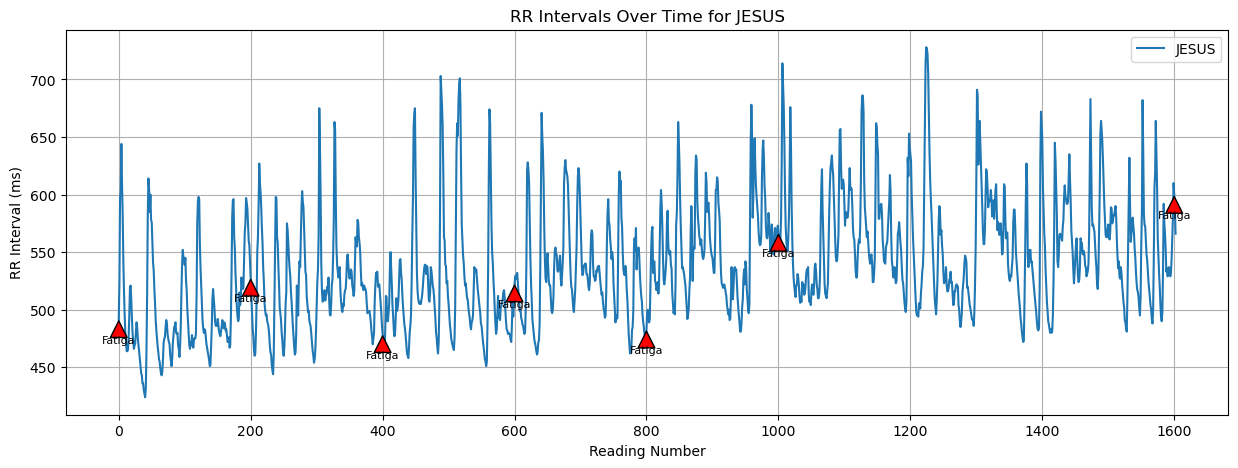

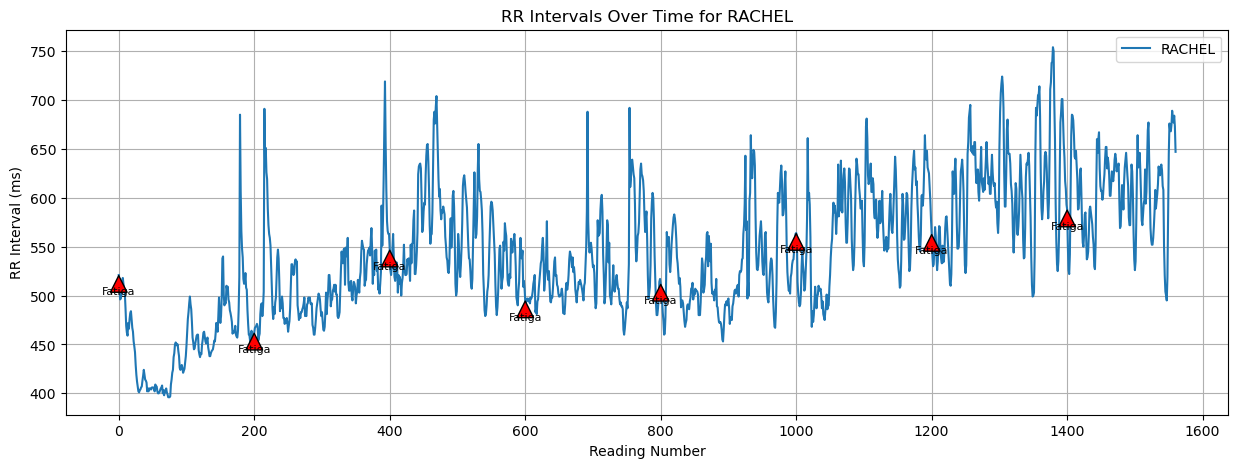

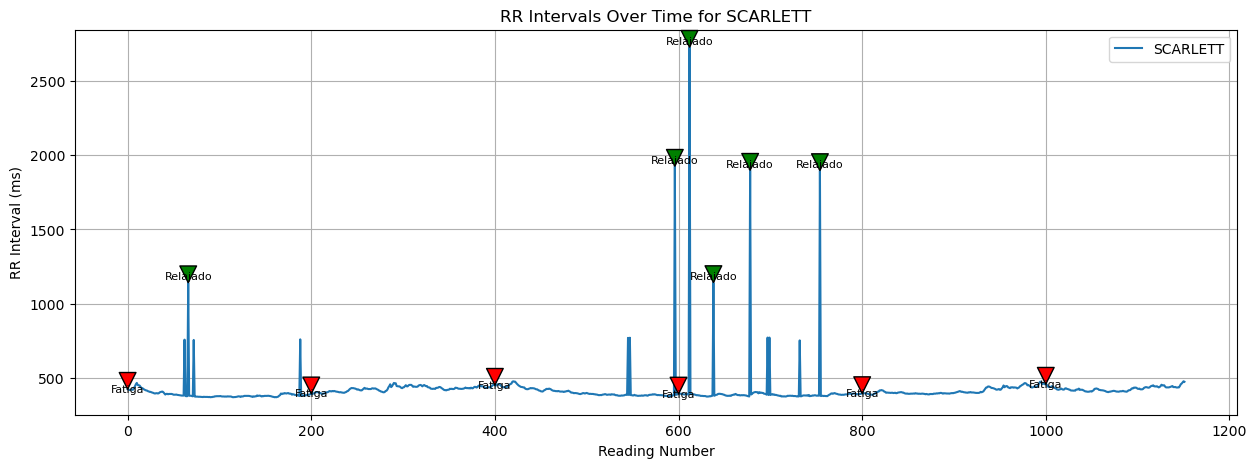

In [62]:
def plot_rr_intervals(file_path, name):
    if not os.path.isfile(file_path):
        print(f"No se encontró el archivo: {file_path}")
        return
    
    df = pd.read_csv(file_path)
    rr_intervals = df.iloc[:, 0].values
    sample_rate = 1  # asumimos una frecuencia de muestreo de 1 Hz
    time_series = [i / sample_rate for i in range(len(rr_intervals))]

    plt.figure(figsize=(15, 5))
    
    # Graficar los intervalos RR
    plt.plot(time_series, rr_intervals, marker='', linestyle='-', markersize=3, label=name)

     # Anotar puntos de fatiga cada 200 lecturas y relajación para todos los puntos correspondientes
    for i, rr in enumerate(rr_intervals):
        if rr < 600 and i % 200 == 0:  # Selecciona cada 200 lecturas para 'Fatiga'
            plt.annotate('Fatiga', xy=(i, rr), xytext=(i, rr-20),
                         arrowprops=dict(facecolor='red', shrink=0.05), fontsize=8, ha='center')
        elif rr > 1000:  # Anota 'Relajado' sin restricción de distancia
            plt.annotate('Relajado', xy=(i, rr), xytext=(i, rr+20),
                         arrowprops=dict(facecolor='green', shrink=0.05), fontsize=8, ha='center')

    plt.title(f'RR Intervals Over Time for {name}')
    plt.xlabel('Reading Number')
    plt.ylabel('RR Interval (ms)')
    plt.legend()
    plt.grid(True)
    plt.show()

for name, file_path in csv_files.items():
    plot_rr_intervals(file_path, name)

Las anotaciones "Fatiga" y "Relajado" están diseñadas para señalar visualmente en qué puntos los intervalos RR caen por debajo o por encima de los umbrales de 600 ms y 1000 ms respectivamente.

- Itera a través de cada intervalo RR y si el intervalo es menor a 600 ms y ocurre en una lectura que es un múltiplo de 200, anota "Fatiga".
- Si el intervalo RR es mayor a 1000 ms, anota "Relajado".

Estos estarán asociados con estados de fatiga y relajación durante el período de grabación.

Las gráficas resultantes muestran la variabilidad de los intervalos RR en el tiempo y destacan estos estados. Es una forma visual de correlacionar la variabilidad de la frecuencia cardíaca con posibles estados fisiológicos, como reacciones al estrés o la relajación. 

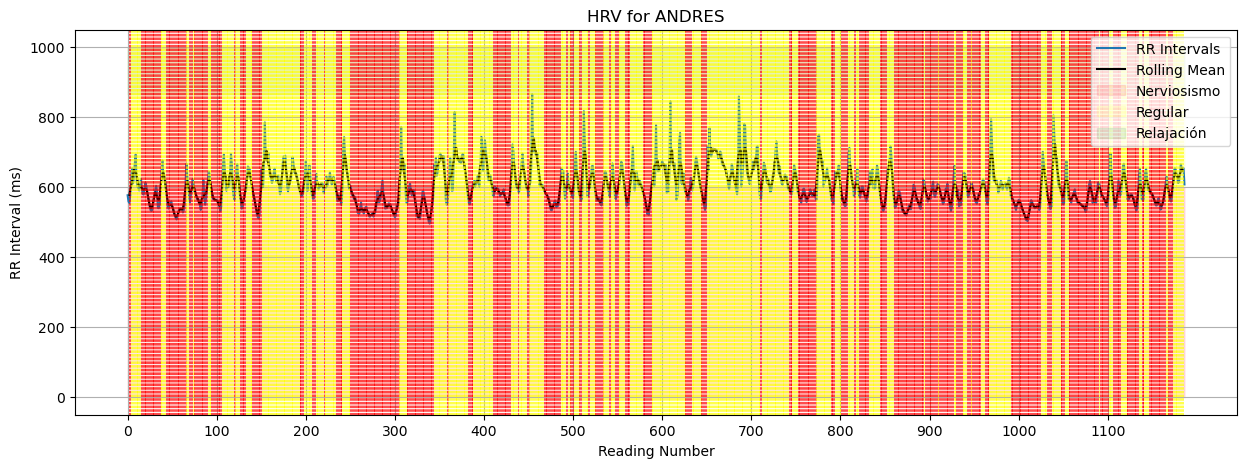

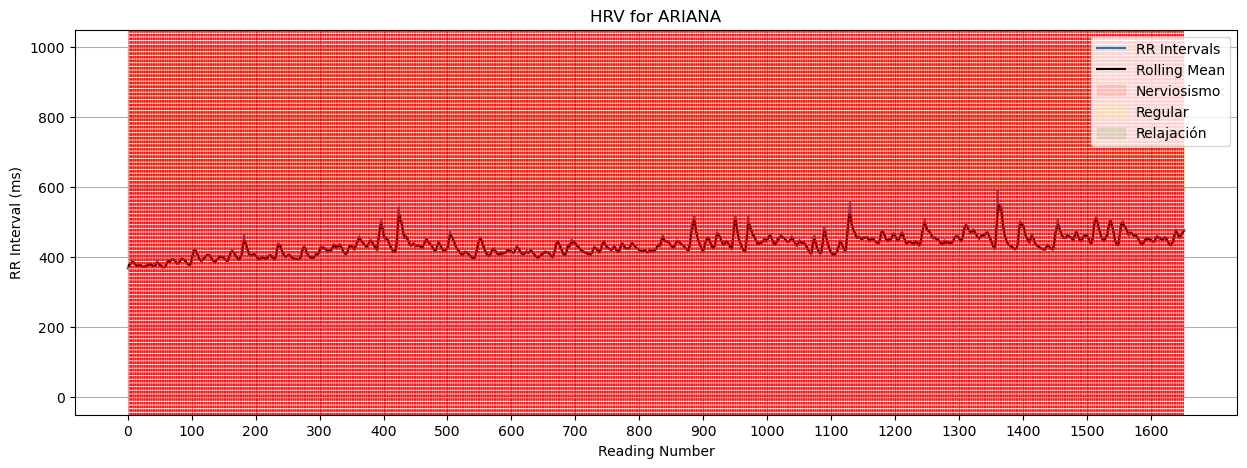

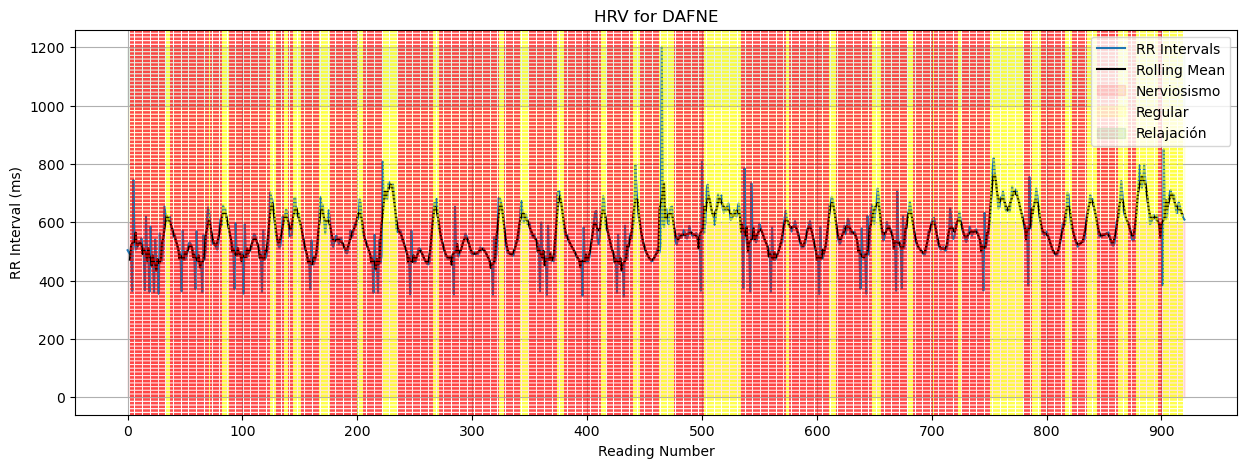

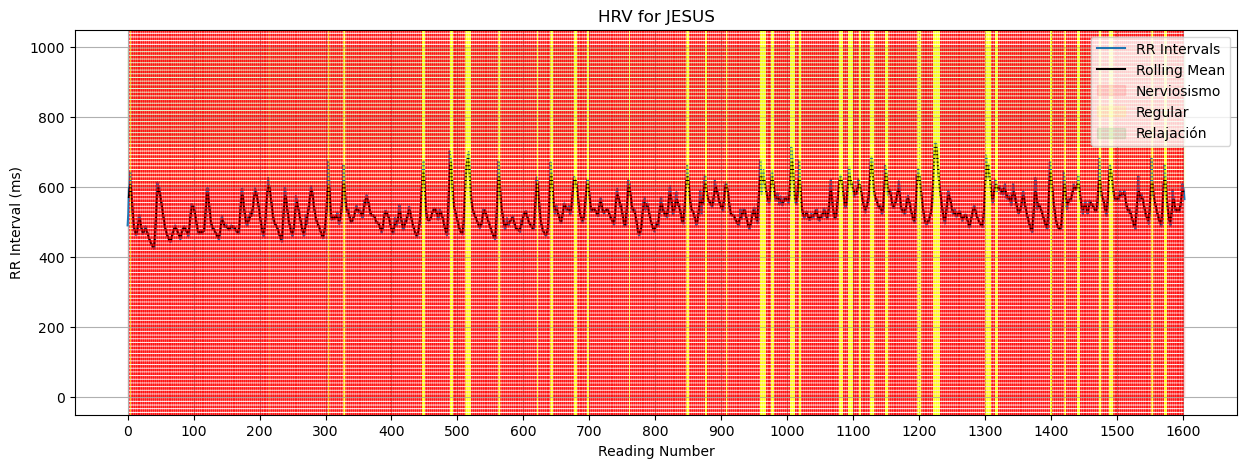

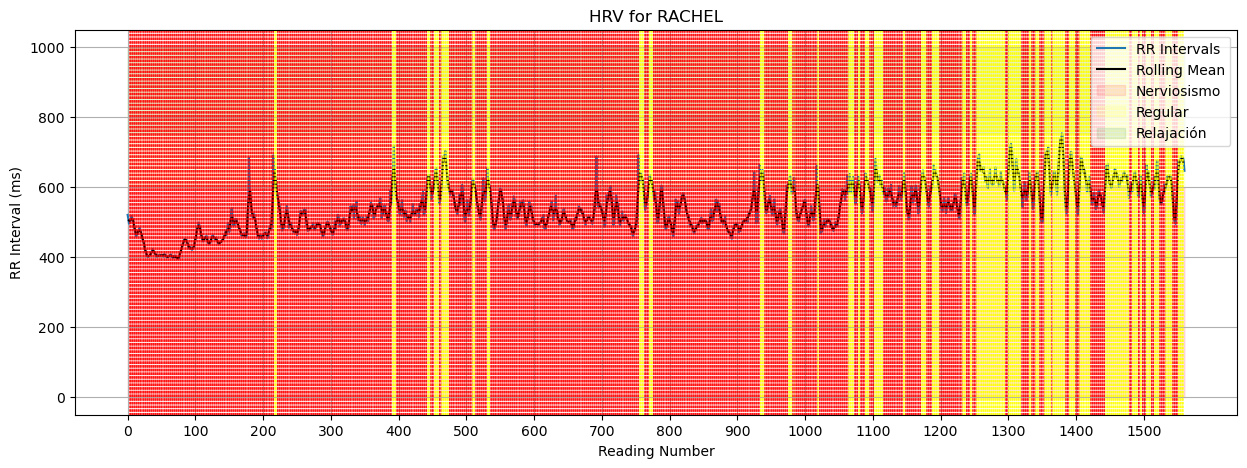

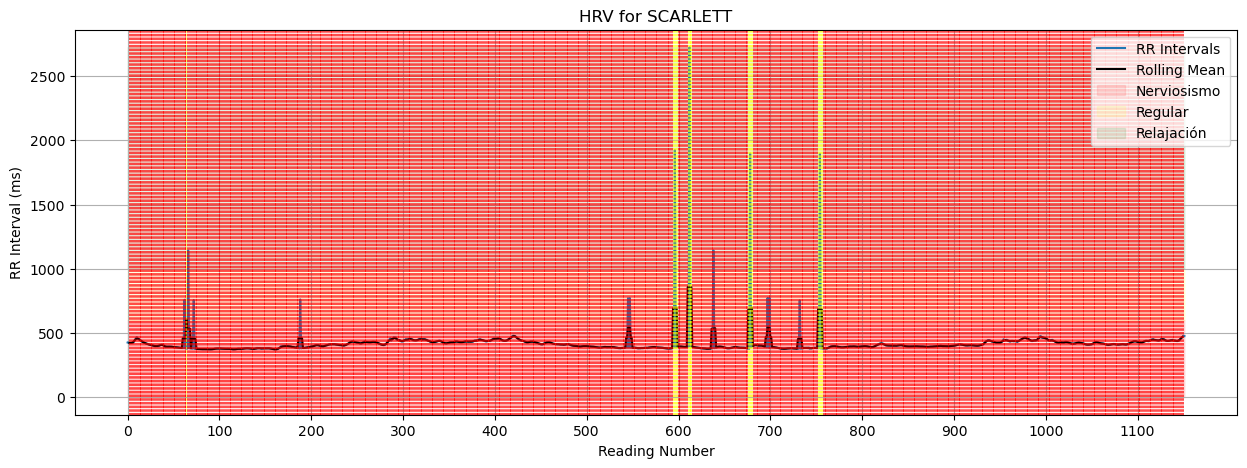

In [49]:
def plot_rr_intervals(file_path, name, window_size=5):
    
    if not os.path.isfile(file_path):
        print(f"No se encontró el archivo: {file_path}")
        return
        
    df = pd.read_csv(file_path)
    rr_intervals = df.iloc[:, 0].values
    time_series = np.arange(len(rr_intervals))
    rolling_mean = pd.Series(rr_intervals).rolling(window=window_size, center=True).mean()

    plt.figure(figsize=(15, 5))

    plt.plot(time_series, rr_intervals, label='RR Intervals')
    plt.plot(time_series, rolling_mean, label='Rolling Mean', color='black')

    plt.fill_between(time_series, 0, 600, color='red', alpha=0.1, label='Nerviosismo')
    plt.fill_between(time_series, 600, 1000, color='yellow', alpha=0.1, label='Regular')
    plt.fill_between(time_series, 1000, max(rr_intervals), color='green', alpha=0.1, label='Relajación')

    for index, rr in enumerate(rolling_mean):
        if pd.isna(rr):
            continue 
        if rr < 600:
            plt.axvline(x=time_series[index], color='red', linestyle='--', linewidth=0.5)
        elif rr > 1000:
            plt.axvline(x=time_series[index], color='green', linestyle='--', linewidth=0.5)
        else:
            plt.axvline(x=time_series[index], color='yellow', linestyle='--', linewidth=0.5)


    plt.title(f'HRV for {name}')
    plt.xlabel('Reading Number')
    plt.ylabel('RR Interval (ms)')
    plt.legend()
    plt.grid(True)
   
    
    plt.xticks(np.arange(0, max(time_series)+1, 100))
    plt.show()

for name, file_path in csv_files.items():
    plot_rr_intervals(file_path, name)


En este codigo se aplicar una media móvil (media móvil simple con una ventana de lecturas), se crea una nueva serie temporal donde cada punto es el promedio de los valores. Este suavizado hace que sea más fácil observar la respuesta general del corazón al estrés o la relajación sin las distracciones de las variaciones momentáneas.

La línea negra de "Rolling Mean" en los gráficos de cada individuo representa esta media móvil y te permite ver dónde, en general, los valores están cambiando con respecto a los umbrales establecidos para el nerviosismo (<600 ms), regular (entre 600 y 1000 ms) y relajación (>1000 ms). Se podria decir si la media móvil permanece debajo de 600 ms durante un período prolongado, podría indicar que el individuo esta en un estado sostenido de nerviosismo o estrés. Por otro lado, si se mantiene por encima de 1000 ms, podría reflejar una relajación más constante.

Al aplicar las líneas verticales y las áreas de color, visualmente codifica estos estados, indicando las áreas rojas dónde los intervalos RR están consistentemente bajos (indicativo de nerviosismo o mayor estrés), y las áreas verdes donde los intervalos RR son altos (posiblemente indicando relajación).

In [68]:
def analyze_intervals(rr_intervals, sample_rate=1):
    nervous_reading_number = []
    relaxed_reading_number = []
    regular_reading_number = []
    
    for i, rr in enumerate(rr_intervals):
        if rr < 600:
            nervous_reading_number.append(i / sample_rate)
        elif rr > 1000:
            relaxed_reading_number.append(i / sample_rate)
        else:
            regular_reading_number.append(i / sample_rate)

    nervous_avg = sum(nervous_reading_number) / len(nervous_reading_number) if nervous_reading_number else 0
    relaxed_avg = sum(relaxed_reading_number) / len(relaxed_reading_number) if relaxed_reading_number else 0
    regular_avg = sum(regular_reading_number) / len(regular_reading_number) if regular_reading_number else 0

    overall = 'Estres(Nervios)' if nervous_avg > regular_avg else 'Sin estres(Sin nervios)' if relaxed_avg > regular_avg else 'Control de estres(Nervios controlados)'
    
    return nervous_reading_number, regular_reading_number, relaxed_reading_number, overall

individual_reading_number = {}

for name, file_path in csv_files.items():
    df = pd.read_csv(file_path)
    rr_intervals = df.iloc[:, 0].values
    nervous, regular, relaxed, overall = analyze_intervals(rr_intervals)
    
    individual_reading_number[name] = {
        'Nervous Reading Number': nervous,
        'Regular Reading Number': regular,
        'Relaxed Reading Number': relaxed,
        'Overall': overall
    }

results_df = pd.DataFrame.from_dict(individual_reading_number, orient='index')

# Guardar los resultados en un archivo CSV
results_df.to_csv('individual_times_with_overall.csv')


Este codigo proporciona una vista de alto nivel de los datos de intervalos RR, categorizando y promediando los momentos en que los sujetos estaban potencialmente nerviosos, relajados o en un estado regular. Además, intenta dar una interpretación general de si el individuo estaba principalmente estresado, relajado o en control de su estrés durante la sesión de medición.

Los resultados se almacenan en un archivo CSV para un análisis posterior o para mantener un registro de estos análisis. 

<center>
<div style="color:;
           display:fill;
           border-radius:2px;
           background-color: violet;
           font-size:80%;
           letter-spacing:0.6px">

<h2 style="padding: 20px;
              color:snow;"> Conclusión
</h2>
</div>

En esta práctica fisiológica, los individuos fueron sometidos a condiciones de estrés al presentar sus propuestas de proyecto final. Los evaluadores indujeron situaciones de nerviosismo con el fin de que los dispositivos colocados en el torso detectaran los intervalos RR (HRV) y los procesaran en la práctica. Mi tarea consistió en analizar los datos para determinar en qué momentos los sujetos experimentaron estrés, estuvieron relajados o tuvieron un control sobre su estrés. Para ello, se realizó una búsqueda de información sobre los intervalos RR y se asignaron etiquetas según los valores, considerando umbrales establecidos para nerviosismo (<600 ms), regular (entre 600 y 1000 ms) y relajación (>1000 ms). 

Se pudo visualizar la variabilidad de la frecuencia cardíaca a través de los intervalos RR, interpretando el estado de los sujetos durante las mediciones. Las áreas sombreadas y las líneas horizontales facilitaron la identificación visual de estos estados, indicando nerviosismo, relajación o control de estrés. Además, se utilizaron criterios específicos para clasificar cada intervalo RR, como "Fatiga" para intervalos menores a 600 ms y múltiplos de 200, o "Relajado" para intervalos mayores a 1000 ms.

La línea negra de "Rolling Mean" en los gráficos de cada individuo representó la media móvil, permitiendo observar la tendencia respecto a los umbrales establecidos. Así, se pudo inferir si el individuo se encontraba en un estado sostenido de nerviosismo o de relajación, dependiendo de si la media móvil permanecía consistentemente por debajo de 600 ms o por encima de 1000 ms respectivamente.La codificación visual mediante líneas verticales y áreas de color destacó las áreas donde los intervalos RR indicaban nerviosismo o relajación. 

Se realizaron cálculos adicionales como RMSSD, SDNN, VL, LF, HF HRV para evaluar la regulación autónoma y la resiliencia al estrés. Se asignaron "Overall" a cada individuo según los datos obtenidos. Esto tambien se hizo para los datos que se categorizarón y promediarón los momentos en que los sujetos estaban potencialmente nerviosos, relajados o en un estado regular. Los resultados fueron almacenados en un archivo CSV para análisis posteriores o registro de seguimiento. E

sta práctica proporcionó una visión detallada de los momentos de nerviosismo, relajación y control de estrés de los sujetos durante la sesión de medición, contribuyendo a una comprensión más profunda de sus respuestas fisiológicas en situaciones estresantes.